In [1]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-29 13:08:10.723625: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 13:08:10.777243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 13:08:10.777285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 13:08:10.778

In [2]:
# Load modlities of GRADE 3
G3_mod_1 = glob.glob(r"GRADE-3/t2/*.png") 
# G3_mod_2 = glob.glob(r"GRADE-3/t1/*.png")
# G3_mod_3 = glob.glob(r"GRADE-3/t2/*.png")
# G3_mod_4 = glob.glob(r"GRADE-3/t1ce/*.png")

# Load modlities of GRADE 4
G4_mod_1 = glob.glob(r"GRADE-4/t2/*.png")
# G4_mod_2 = glob.glob(r"GRADE-4/t1/*.png")
# G4_mod_3 = glob.glob(r"GRADE-4/t2/*.png")
# G4_mod_4 = glob.glob(r"GRADE-4/t1ce/*.png")

#G3 data place holder
G3_mod_1_data = []
# G3_mod_2_data = []
# G3_mod_3_data = []
# G3_mod_4_data = []

#G4 data place holder
G4_mod_1_data = []
# G4_mod_2_data = []
# G4_mod_3_data = []
# G4_mod_4_data = []


# Read GRADE-3 images and store them in placeholder
for img in G3_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G3_mod_1_data.append(data)

# for img in G3_mod_2:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_2_data.append(data)

# for img in G3_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_3_data.append(data)
    
# for img in G3_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_4_data.append(data)

# Read GRADE-4 images and store them in placeholder
for img in G4_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G4_mod_1_data.append(data)

# for img in G4_mod_2:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_2_data.append(data)
    
# for img in G4_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_3_data.append(data)
    
# for img in G4_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_4_data.append(data)

In [3]:
''' 
Create two array 'zeros' and 'ones' containing all zeros and ones respectively. 
Here the  zeros array serves the purpose of labels for GRADE-3 and the ones array serves the purpose of labels for GRADE-4
'''

zeros= np.zeros(len(G3_mod_1))

ones = np.ones(len(G4_mod_1))


In [4]:
# Combine same modalities of different GRADES for training. 

img_mod_1_data = G3_mod_1_data + G4_mod_1_data
# img_mod_2_data = G3_mod_2_data + G4_mod_2_data
# img_mod_3_data = G3_mod_3_data + G4_mod_3_data
# img_mod_4_data = G3_mod_4_data + G4_mod_4_data

img_mod_1_data = np.array(img_mod_1_data)
# img_mod_2_data = np.array(img_mod_2_data)
# img_mod_3_data = np.array(img_mod_3_data)
# img_mod_4_data = np.array(img_mod_4_data)

img_mod_1 = img_mod_1_data/255
# img_mod_2 = img_mod_2_data/255
# img_mod_3 = img_mod_3_data/255
# img_mod_4 = img_mod_4_data/255

# print(img_mod_1_data.shape, img_mod_2_data.shape, img_mod_3_data.shape, img_mod_4_data.shape)
print(img_mod_1_data.shape)

(2856, 224, 224, 3)


In [5]:
# Combining labels for both GRADES into one array/list

labels = np.append(zeros, ones)

In [6]:
# CNN model definition

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

2023-11-29 13:08:20.586204: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 13:08:20.623562: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 13:08:20.623633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 13:08:20.626872: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 13:08:20.626946: I external/local_xla/xla/stream_executor

In [7]:
# Compile the model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", "AUC"])

In [8]:
#comb = np.concatenate([img_mod_1, img_mod_2, img_mod_3, img_mod_4], axis = -1)
comb = img_mod_1

print("Mod 1 and Mod 2 Shape: ", comb.shape)
print("Labels Shape: ", labels.shape)

Mod 1 and Mod 2 Shape:  (2856, 224, 224, 3)
Labels Shape:  (2856,)


In [9]:
# Randomly and evenly(stratify) Spliting the data into train and test sets 
comb_train, comb_test, comb_labels_train, comb_labels_test = train_test_split(comb, labels, stratify=labels, test_size=0.2)

# Randomly and evenly(stratify) Spliting the train data into train and validation sets
comb_train, comb_val, comb_labels_train, comb_labels_val = train_test_split(comb_train, comb_labels_train, stratify=comb_labels_train, test_size=0.25)

'''
Training data = 60%
Validation data = 20%
Test data = 20%
'''
print(comb_train.shape, comb_labels_train.shape)
print(comb_val.shape, comb_labels_val.shape)
print(comb_test.shape, comb_labels_test.shape)

(1713, 224, 224, 3) (1713,)
(571, 224, 224, 3) (571,)
(572, 224, 224, 3) (572,)


In [10]:
# Train the model and store the results
history = model.fit(comb_train, comb_labels_train, batch_size = 32, epochs = 20, validation_data = (comb_val, comb_labels_val))

Epoch 1/20


2023-11-29 13:08:32.074508: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2023-11-29 13:08:35.990967: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f853c12e610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 13:08:35.991027: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2023-11-29 13:08:35.997678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701243516.159023   12737 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 [==============================] - 16s 89ms/step - loss: 0.7050 - accuracy: 0.5663 - precision: 0.5567 - recall: 0.6975 - auc: 0.6074 - val_loss: 0.5823 - val_accuracy: 0.6865 - val_precision: 0.6811 - val_recall: 0.7118 - val_auc: 0.7514
Epoch 2/20
54/54 [==============================] - 3s 52ms/step - loss: 0.4904 - accuracy: 0.7472 - precision: 0.7538 - recall: 0.7425 - auc: 0.8375 - val_loss: 0.4022 - val_accuracy: 0.8179 - val_precision: 0.7822 - val_recall: 0.8854 - val_auc: 0.9058
Epoch 3/20
54/54 [==============================] - 3s 51ms/step - loss: 0.2527 - accuracy: 0.8821 - precision: 0.8852 - recall: 0.8811 - auc: 0.9616 - val_loss: 0.1919 - val_accuracy: 0.9247 - val_precision: 0.9623 - val_recall: 0.8854 - val_auc: 0.9842
Epoch 4/20
54/54 [==============================] - 3s 48ms/step - loss: 0.0993 - accuracy: 0.9679 - precision: 0.9732 - recall: 0.9630 - auc: 0.9943 - val_loss: 0.0991 - val_accuracy: 0.9667 - val_precision: 0.9498 - val_recall: 0.9861 - val_au

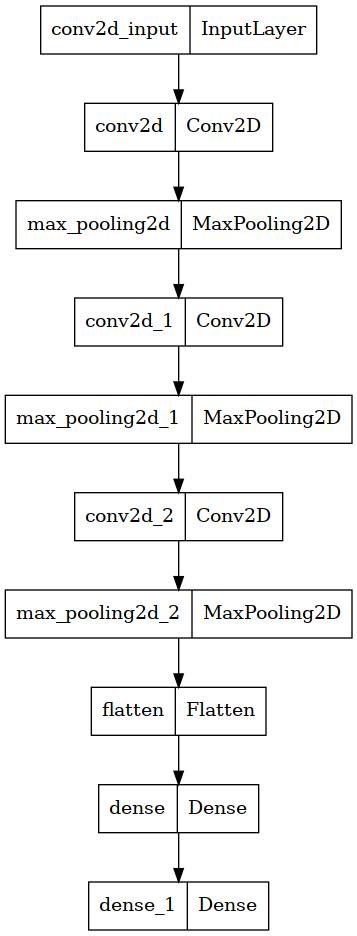

In [11]:
from keras.utils import plot_model
plot_model(model)

In [12]:
# Evaluate model on unseen (test) data

y_pred = model.predict(comb_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

# Calculate accuracy
accuracy = accuracy_score(comb_labels_test, y_pred_binary)
precision = precision_score(comb_labels_test, y_pred_binary)
recall = recall_score(comb_labels_test, y_pred_binary)
f1 = f1_score(comb_labels_test, y_pred_binary)

# Confusion matrix
conf_matrix = confusion_matrix(comb_labels_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

18/18 [==============================] - 1s 33ms/step
Accuracy: 0.9912587412587412
Precision: 0.9965034965034965
Recall: 0.986159169550173
F1 Score: 0.9913043478260869
Confusion Matrix:
[[282   1]
 [  4 285]]


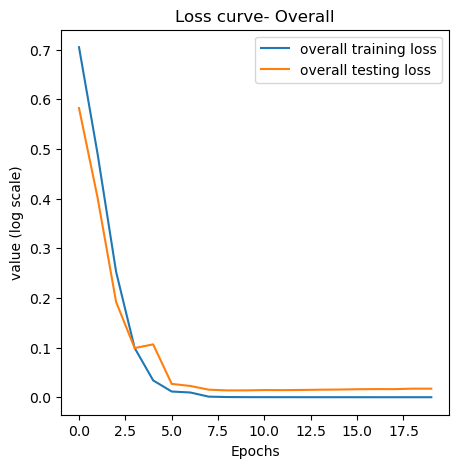

In [13]:
# Loss Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(history.history["loss"], label="overall training loss")
plt.plot(history.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

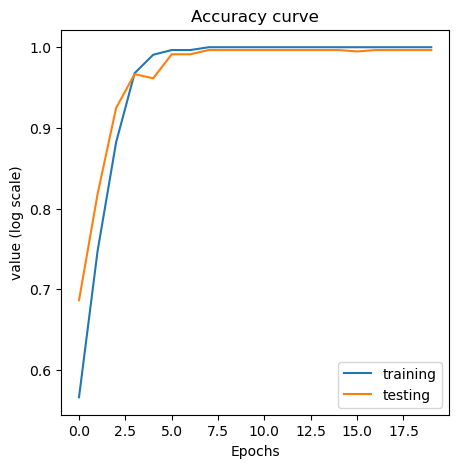

In [14]:
# Accuracy Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

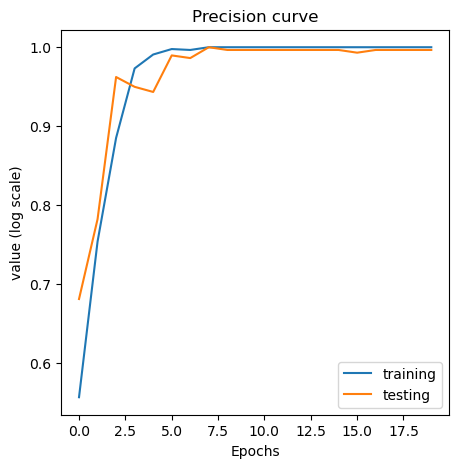

In [15]:
# Precision Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve")
plt.plot(history.history["precision"], label="training")
plt.plot(history.history["val_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

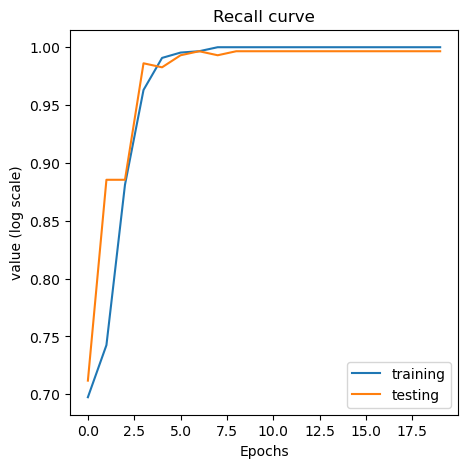

In [16]:
#Recall curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve")
plt.plot(history.history["recall"], label="training")
plt.plot(history.history["val_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

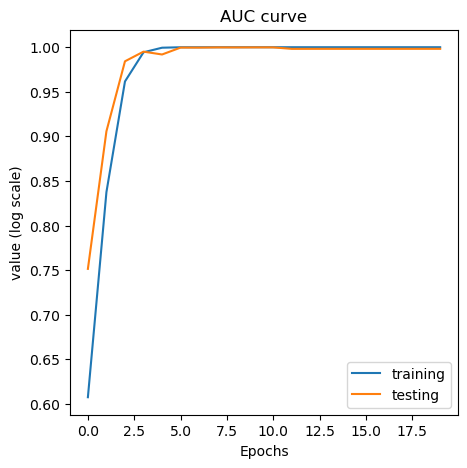

In [17]:
# AUC curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()